In [16]:
from plotly.subplots import make_subplots
from sklearn.feature_selection import mutual_info_regression

import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))# loading package





/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [17]:
#loading data 
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [18]:
train.head()
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
# get categorical variables
cat_cols = train.select_dtypes(include='object').columns

# get cols with null
cols_with_null = train.columns[train.isnull().any()]
cols_with_null = train[cols_with_null].isnull().mean().sort_values(ascending=False).index

# get cols of categorical variables with null
cat_cols_with_null = cat_cols.intersection(cols_with_null)

# get the missing value ratio
train[cols_with_null].isnull().mean()

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

del the col when miss>80%

In [18]:
train_df = train.drop(columns = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

checking the data status and val

In [19]:
y = train_df['SalePrice'].copy()
train_df = train_df.drop(columns = 'SalePrice')

num_cols = [i for i in train_df.columns if train_df[i].dtype in ['int', 'float']]
cat_cols = [i for i in train_df.columns if train_df[i].dtype == 'object']

print('Number of numerical columns:', len(num_cols))
print('Number of categorical columns:', len(cat_cols))

Number of numerical columns: 36
Number of categorical columns: 38


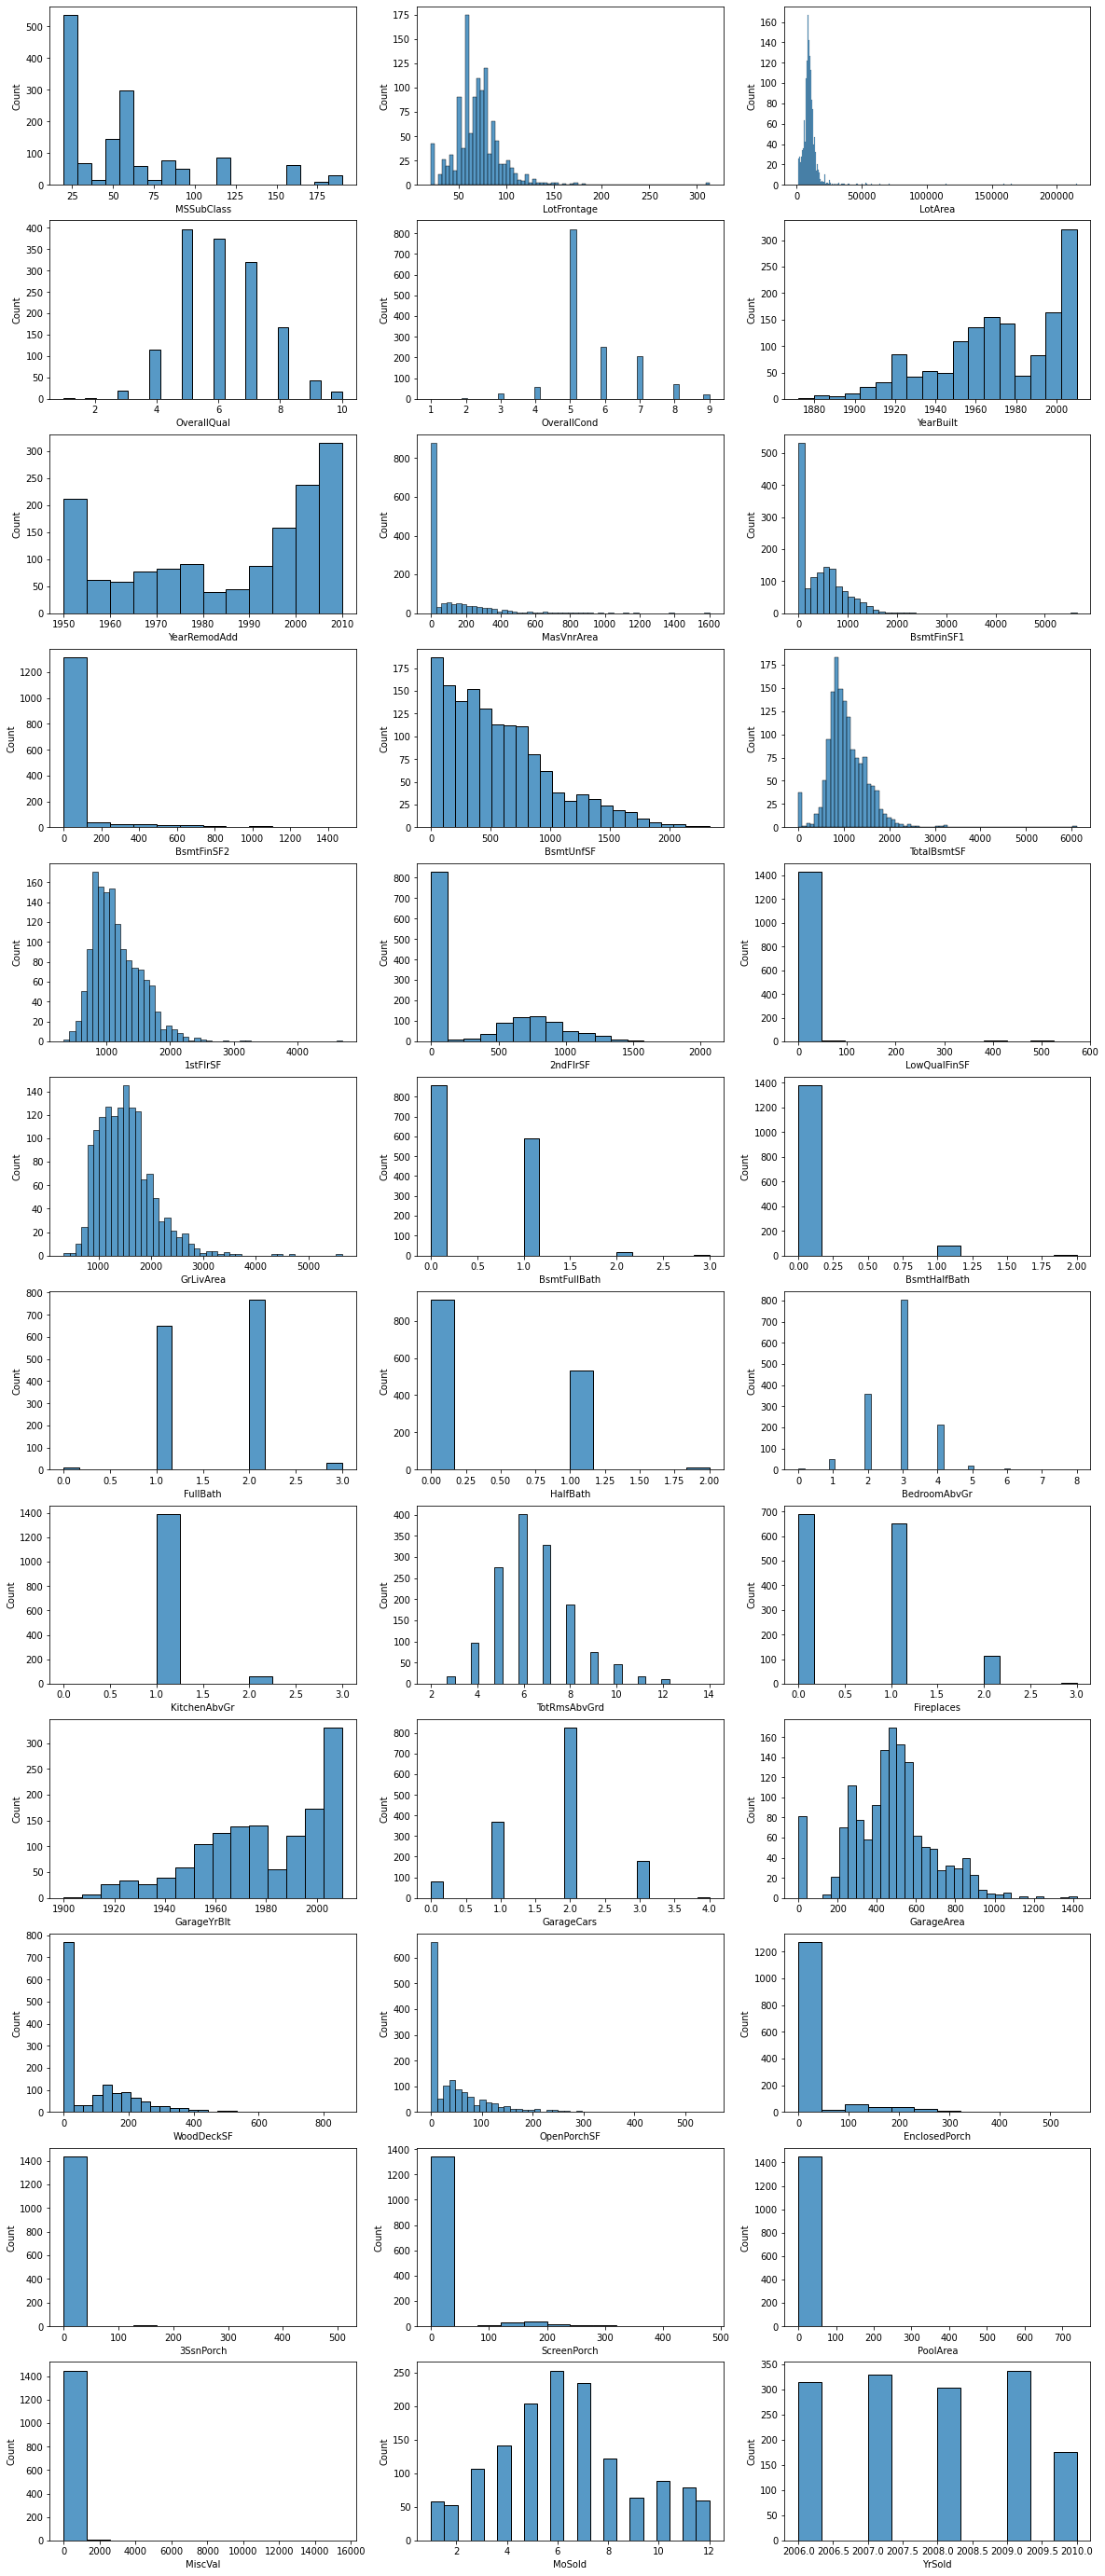

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
 
fig, ax = plt.subplots(12, 3, figsize = (20, 50))
c = 0
for i in range(12):
    for j in range(3):
        if c == 36:
            break
        sns.histplot(x = train_df[num_cols[c]], ax = ax[i, j])
        c += 1
plt.show()